**Objective:**


*   To identify the different factors that influence purchase intention of the website visitors.
*   To make a model to predict if someone visiting the website will make a purchase by shopping or just leave the website without buying anything.



This notebook provides an approach to building a classification model on a dataset of online shoppers visiting an ecommerce website 'DigiCart'. The objective of the model is to predict whether a website visitor will make a transaction of purchase by shopping something or not i.e. just leave the website without buying anything.

The approach followed to do this is by first having an overview of the data and performing Exploratory Data Analysis (EDA), then preparing the data by filtering the attributes which would not be useful for building the model, followed by feature engineering, data partitioning, model building and performance evaluation. Multiple models can also be built and their performance evaluation metrics can be compared to identify and select the best classification model.

**Problem Statement:** Classification of website visitors who will shop/not shop.

**Dataset Link:** https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset

**Information about the Dataset/Data Dictionary:**
1. The dataset consists of 10 numerical and 8 categorical attributes.
2. Each record would belong to a different user in a 1-year period to avoid
any tendency to a specific campaign, special day, user
profile, or period.
3. **"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related"** and **"Product Related Duration"** represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories.
4. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another.
5. The **"Bounce Rate", "Exit Rate"** and **"Page Value"** features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session.
6. The value of **"Exit Rate"** feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session.
7. The **"Page Value"** feature represents the average value for a web page that a user visited before completing an e-commerce transaction.
8. The **"Special Day"** feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.
9. The dataset also includes **"Operating System", "Browser", "Region", "Traffic Type", "Visitor Type"** as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.
10. The dataset has 12330 records for each column and each record belongs to a different user in a 1-year period to avoid
any tendency to a specific campaign, special day, user
profile, or period.

In [ ]:
#Importing the dataset into the notebook

from google.colab import files
uploaded = files.upload()


Saving online_shoppers_intention.csv to online_shoppers_intention (1).csv


In [ ]:
#Importing the necessary libraries to read the dataset and perform Exploratory Data Analysis (EDA)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Storing the dataset in a variable called 'shoppers'

shoppers = pd.read_csv('online_shoppers_intention.csv')

#We will save the original raw data in a variable 'df' so that we can access it whenever we want to.
#The analysis will be done on 'shoppers' data and 'df' will remain untouched.
df = shoppers.copy()

In [ ]:
shoppers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
print("\nFirst Five Rows of the Dataset:")
shoppers.head()


First Five Rows of the Dataset:


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [10]:
#Finding the number of unique values of each column

print("\nUnique Values in every feature:\n")
shoppers.nunique()


Unique Values in every feature:



Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

In [9]:
# Displaying descriptive statistics of the dataset
print("\nDescriptive Statistics of the Dataset:")
shoppers.describe(include='all').T



Descriptive Statistics of the Dataset:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Administrative,12330.0,NaN,NaN,NaN,2.315166,3.321784,0.0,0.0,1.0,4.0,27.0
Administrative_Duration,12330.0,NaN,NaN,NaN,80.818611,176.779107,0.0,0.0,7.5,93.25625,3398.75
Informational,12330.0,NaN,NaN,NaN,0.503569,1.270156,0.0,0.0,0.0,0.0,24.0
Informational_Duration,12330.0,NaN,NaN,NaN,34.472398,140.749294,0.0,0.0,0.0,0.0,2549.375
ProductRelated,12330.0,NaN,NaN,NaN,31.731468,44.475503,0.0,7.0,18.0,38.0,705.0
ProductRelated_Duration,12330.0,NaN,NaN,NaN,1194.74622,1913.669288,0.0,184.1375,598.936905,1464.157214,63973.52223
BounceRates,12330.0,NaN,NaN,NaN,0.022191,0.048488,0.0,0.0,0.003112,0.016813,0.2
ExitRates,12330.0,NaN,NaN,NaN,0.043073,0.048597,0.0,0.014286,0.025156,0.05,0.2
PageValues,12330.0,NaN,NaN,NaN,5.889258,18.568437,0.0,0.0,0.0,0.0,361.763742
SpecialDay,12330.0,NaN,NaN,NaN,0.061427,0.198917,0.0,0.0,0.0,0.0,1.0


###Key Observations

Data Quality: No missing values across all columns.

**Categorical Variables:** 'Month', 'VisitorType', 'Weekend', and 'Revenue'.

**Numerical Variables:** Mix of integers and floats for various features.

**Boolean Variables:** 'Weekend' and 'Revenue' indicating binary values.

###Descriptive Statistics Highlights:

Month: The dataset includes entries from different months, with **'May' being the most common.**

VisitorType: **'Returning_Visitor'** is the most common type.


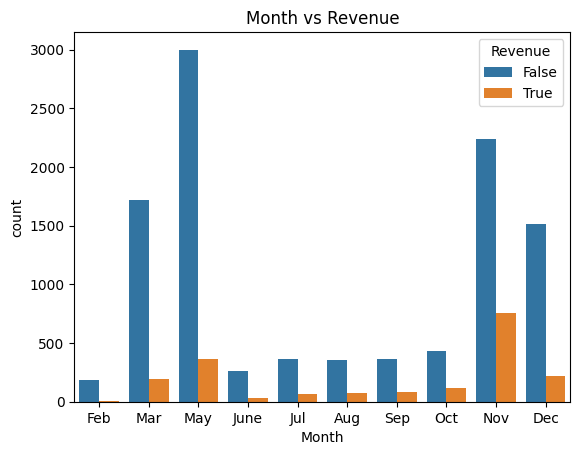

In [ ]:
# Code for analyzing relationships of 'Month', 'Region', 'Weekend', and 'VisitorType' with 'Revenue'

# Month vs Revenue
sns.countplot(x='Month', hue='Revenue', data=shoppers, order=['Feb', 'Mar', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Month vs Revenue')


plt.show()



**Pattern Observed:** The number of sessions and revenue generation vary significantly across different months. Notably, months like November, May, and December show higher overall sessions and a relatively higher proportion of revenue-generating sessions.

**Insights:** This suggests seasonality in online shopping behavior, possibly linked to holiday seasons or specific marketing campaigns during these months.

Text(0.5, 1.0, 'Region vs Revenue')

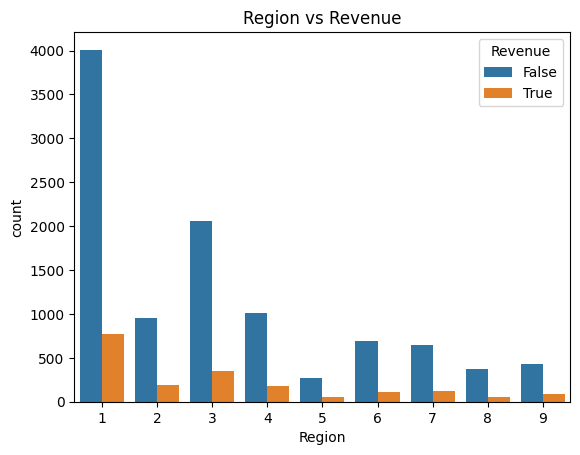

In [ ]:
# Region vs Revenue
sns.countplot(x='Region', hue='Revenue', data=shoppers)
plt.title('Region vs Revenue')

2. Region vs Revenue

**Pattern Observed:** Different regions show varying patterns in terms of sessions and revenue generation. Some regions (like 1, 3, and 4) have higher overall sessions and a noticeable proportion of sessions resulting in revenue.

**Insights:** This indicates that geographical factors might influence online shopping behavior, and targeting strategies could be region-specific.

Text(0.5, 1.0, 'Weekend vs Revenue')

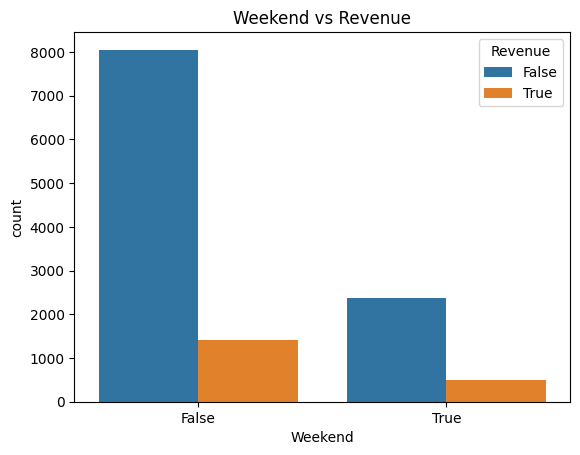

In [ ]:
# Weekend vs Revenue
sns.countplot(x='Weekend', hue='Revenue', data=shoppers)
plt.title('Weekend vs Revenue')


3. Weekend vs Revenue

**Pattern Observed:** The countplot indicates that there are fewer sessions during weekends, but the proportion of sessions leading to revenue doesn't drastically change between weekends and weekdays.

**Insights:** This suggests that while overall traffic might be lower during weekends, the likelihood of sessions resulting in a purchase doesn't diminish significantly, indicating consistent buying behavior across days of the week.


Text(0.5, 1.0, 'Visitor Type vs Revenue')

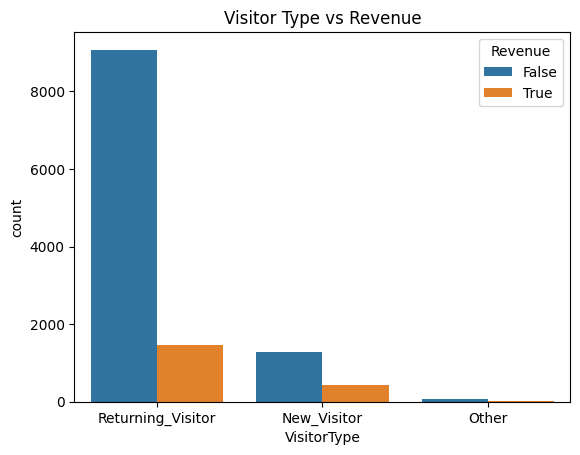

In [ ]:
# VisitorType vs Revenue
sns.countplot(x='VisitorType', hue='Revenue', data=shoppers)
plt.title('Visitor Type vs Revenue')

4. Visitor Type vs Revenue

**Pattern Observed:** 'Returning Visitor' type dominates the dataset in terms of the number of sessions, with a significant proportion leading to revenue. 'New Visitor' shows a high conversion rate as well, though their total number is lower.

**Insights:** This highlights the importance of both retaining customers and attracting new ones, as both groups contribute notably to revenue. The high conversion rate for new visitors could indicate effective acquisition strategies.

<ipython-input-11-f8887e9a4cac>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(shoppers.corr(), annot=True, cmap='coolwarm')


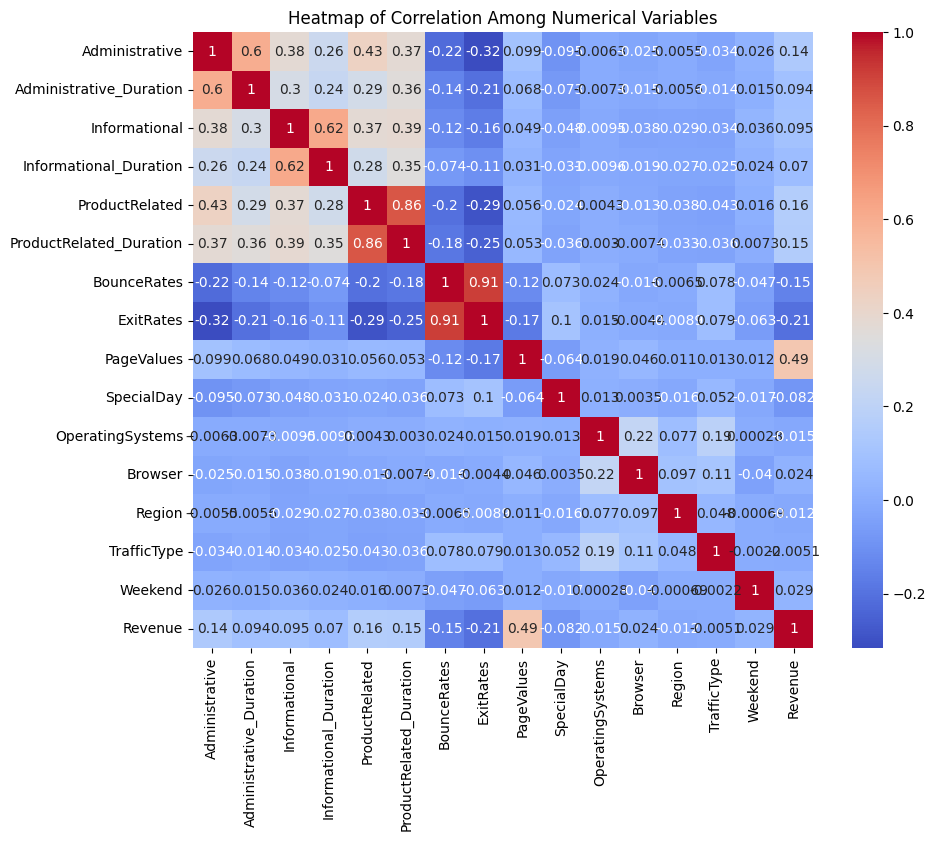

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(shoppers.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Among Numerical Variables')
plt.show()

# Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler


data_encoded = pd.get_dummies(shoppers, drop_first=True)
X = data_encoded.drop('Revenue', axis=1)
y = data_encoded['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

y_pred = log_reg.predict(X_test_scaled)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.89      0.98      0.93      3124
        True       0.77      0.36      0.49       575

    accuracy                           0.88      3699
   macro avg       0.83      0.67      0.71      3699
weighted avg       0.87      0.88      0.86      3699

[[3061   63]
 [ 369  206]]
0.6690472081500862


**Logistic Regression with Oversampaling**



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight


data_encoded = pd.get_dummies(shoppers, drop_first=True)
X = data_encoded.drop('Revenue', axis=1)
y = data_encoded['Revenue']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Computing class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# Creating the Logistic Regression model with class weights
log_reg = LogisticRegression(max_iter=1000, class_weight=class_weights_dict)
log_reg.fit(X_train_scaled, y_train)

# Predicting on the test set
y_pred = log_reg.predict(X_test_scaled)

# Evaluation
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.95      0.87      0.91      3124
        True       0.52      0.76      0.62       575

    accuracy                           0.85      3699
   macro avg       0.73      0.82      0.76      3699
weighted avg       0.88      0.85      0.86      3699

[[2713  411]
 [ 136  439]]
0.8159580804988031


Let's compare the performance of the Logistic Regression (LR) model without and with oversampling (using SMOTE) to understand how addressing class imbalance affected the model's performance:

### Without Oversampling
1. **Precision and Recall for 'True' Class (Revenue Sessions)**:
   - Precision: 77%
   - Recall: 36%
2. **Overall Accuracy**: 88%
3. **Confusion Matrix**: 206 True Positives and 369 False Negatives.
4. **ROC-AUC Score**: 0.669

### With Oversampling (SMOTE)
1. **Precision and Recall for 'True' Class (Revenue Sessions)**:
   - Precision: 52%
   - Recall: 76%
2. **Overall Accuracy**: 85%
3. **Confusion Matrix**: 439 True Positives and 136 False Negatives.
4. **ROC-AUC Score**: 0.816

### Interpretation and Comparison

1. **Recall Improvement**: The most notable improvement with oversampling is in recall for the 'True' class, increasing from 36% to 76%. This indicates that the model with SMOTE is much more effective in identifying revenue sessions.

2. **Precision Trade-off**: There is a significant decrease in precision for the 'True' class (from 77% to 52%) with oversampling. This means that while the model is identifying more true revenue sessions, it is also making more false positive errors.

3. **Accuracy**: The overall accuracy has decreased slightly from 88% to 85% with oversampling. This decrease is expected as the model is now more sensitive to the minority class.

4. **ROC-AUC Score**: The ROC-AUC score improves from 0.669 to 0.816 with oversampling, indicating a better model performance in distinguishing between revenue and non-revenue sessions.

5. **Confusion Matrix**: The increase in True Positives and decrease in False Negatives with oversampling is a positive outcome, as it shows the model's improved ability to identify actual revenue opportunities.

### Which Approach is Better?
- The choice between the two approaches depends on the business context and what is more critical: Maximizing the identification of revenue opportunities (Recall) or ensuring a high confidence in the predictions made (Precision).
- If **identifying as many revenue sessions as possible is the priority**, then the LR model with SMOTE is better due to its significantly higher recall.
- However, if the cost associated with false positives is high (misidentifying non-revenue sessions as revenue), the lower precision of the oversampled model might be a concern.
- The improvement in ROC-AUC score with oversampling suggests that the model's overall ability to distinguish between classes has improved, which can be particularly important in scenarios where both classes are important.

In summary, the oversampled model is more capable of identifying revenue sessions, which can be crucial for maximizing potential revenue opportunities, but it also increases the likelihood of false positives. The choice should align with the specific goals and tolerances of the business strategy.


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Creating the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Fit the model
rf_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(roc_auc_score(y_test, y_pred_rf))


              precision    recall  f1-score   support

       False       0.92      0.97      0.94      3124
        True       0.73      0.53      0.61       575

    accuracy                           0.90      3699
   macro avg       0.83      0.75      0.78      3699
weighted avg       0.89      0.90      0.89      3699

[[3015  109]
 [ 273  302]]
0.7451631130657463


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import pandas as pd


data_encoded = pd.get_dummies(shoppers, drop_first=True)
X = data_encoded.drop('Revenue', axis=1)
y = data_encoded['Revenue']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Oversampling using SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Training Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

# Predicting on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluation
print("Random Forest Classifier Evaluation")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_rf))


Random Forest Classifier Evaluation
              precision    recall  f1-score   support

       False       0.95      0.92      0.94      3124
        True       0.63      0.73      0.68       575

    accuracy                           0.89      3699
   macro avg       0.79      0.82      0.81      3699
weighted avg       0.90      0.89      0.90      3699

[[2883  241]
 [ 158  417]]
ROC-AUC Score: 0.824036352502366


### Without Oversampling
1. **Precision and Recall for 'True' Class (Revenue Sessions)**:
   - Precision: 73%
   - Recall: 53%
2. **Overall Accuracy**: 90%
3. **Confusion Matrix**: 302 True Positives and 273 False Negatives.
4. **ROC-AUC Score**: 0.745

### With Oversampling (SMOTE)
1. **Precision and Recall for 'True' Class (Revenue Sessions)**:
   - Precision: 63%
   - Recall: 73%
2. **Overall Accuracy**: 89%
3. **Confusion Matrix**: 417 True Positives and 158 False Negatives.
4. **ROC-AUC Score**: 0.824

### Interpretation and Comparison

1. **Recall Improvement**: The use of SMOTE improves the recall for the revenue class significantly (from 53% to 73%), indicating that the model with oversampling is better at identifying revenue sessions.

2. **Precision Trade-off**: There is a decrease in precision (from 73% to 63%) with oversampling. This suggests that while the model with SMOTE is capturing more actual revenue cases, it is also incorrectly labeling more non-revenue cases as revenue.

3. **Accuracy**: The overall accuracy drops slightly with oversampling (from 90% to 89%), but this is a minor decrease considering the significant improvement in recall for the revenue class.

4. **ROC-AUC Score**: The increase in the ROC-AUC score (from 0.745 to 0.824) with SMOTE indicates a better overall performance in distinguishing between revenue and non-revenue sessions.

5. **Confusion Matrix**: The increase in True Positives (from 302 to 417) and the decrease in False Negatives (from 273 to 158) with SMOTE is a positive outcome, especially if correctly identifying revenue sessions is a priority.

### Which Approach is Better?

- If the **goal is to maximize the identification of potential revenue opportunities** (i.e., if missing out on these opportunities is costly), the model with SMOTE is preferable due to its higher recall and ROC-AUC score.

- However, if the **cost of false alarms** (i.e., incorrectly identifying a session as revenue-generating) is high, the decrease in precision with SMOTE needs to be considered.
- The choice depends on the specific business context and the relative costs associated with false positives and false negatives.

Overall, the model with SMOTE shows better performance in terms of capturing more actual revenue sessions, which can be crucial for businesses focused on maximizing revenue opportunities. However, it's important to weigh this against the increased number of false positives.

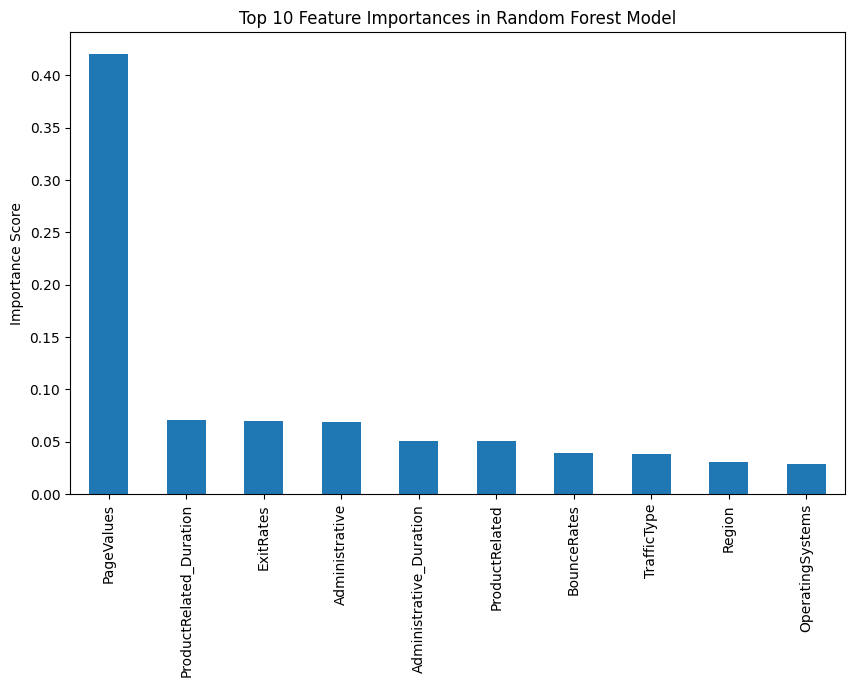

In [ ]:
# Extract feature importances
feature_importances = rf_model.feature_importances_

# Creating a Series for the feature importances
importances = pd.Series(feature_importances, index=X.columns)

# Sorting the importances
sorted_importances = importances.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sorted_importances[:10].plot(kind='bar')  # Adjust number of features as needed
plt.title('Top 10 Feature Importances in Random Forest Model')
plt.ylabel('Importance Score')
plt.show()
